# EDA

In [4]:
import sys, os
import pandas as pd
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
from turkish_music_emotion.dataset import DataHandler
from turkish_music_emotion.dataset import MissingValueAnalyzer 
from turkish_music_emotion.features import DataFrameAnalyzer
from turkish_music_emotion.features import DataStatistics
from turkish_music_emotion.features import PCAVisualizer
from turkish_music_emotion.dataset import LabelEncoderWrapper
from turkish_music_emotion.plots import CorrelationHeatmap
from turkish_music_emotion.plots import ClassPlotter
from turkish_music_emotion.plots import BoxPlotGenerator

In [5]:
dh = DataHandler()

In [6]:
df = dh.load_data('/data/raw/Acoustic Features.csv')


TypeError: DataHandler.load_data() missing 2 required positional arguments: 'input_path' and 'input_filename'

In [16]:
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [17]:
# Imprimir la distribucion de clases
analyzer = DataFrameAnalyzer(df)
analyzer.print_info() 
analyzer.print_class_distribution('Class')

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5        

In [18]:
# Imprimir estadísticas
statistics = DataStatistics(df)
statistics.print_summary_statistics()


Summary statistics:
       _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       400.000000       400.000000         400.000000   400.000000   
mean          0.134650         0.553605           7.145932   123.682020   
std           0.064368         0.050750           2.280145    34.234344   
min           0.010000         0.302000           3.580000    48.284000   
25%           0.085000         0.523000           5.859500   101.490250   
50%           0.128000         0.553000           6.734000   120.132500   
75%           0.174000         0.583250           7.823500   148.986250   
max           0.431000         0.703000          23.475000   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    400.000000    400.000000    400.000000    400.000000    400.000000   
mean       2.456422      0.071890      0.488065      0.030465      0.178897   
std        0.799262      0.537865      0.294607      0.275839     

In [19]:
# Buscar valores faltantes
analyzer = MissingValueAnalyzer(df)
analyzer.display_missing_columns()

No hay columnas con valores faltantes.


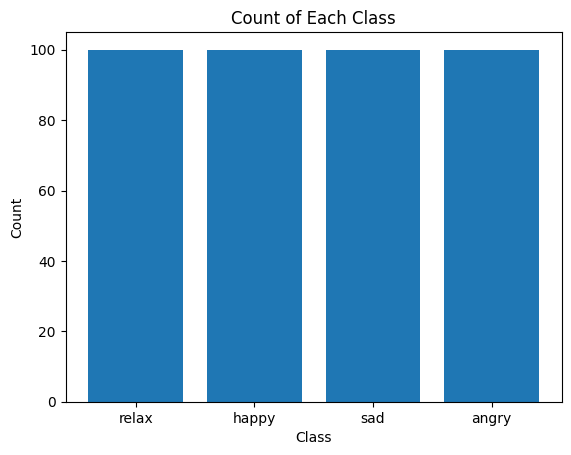

In [20]:
# Graficar cada clase de emociones
plotter = ClassPlotter(df, 'Class')  
plotter.count_classes()                
plotter.plot_classes() 

In [21]:
# codificación de etiquetas (label encoding) para columnas categóricas
encoder = LabelEncoderWrapper(df)     
encoder.encode_column('Class')          
encoded_data = encoder.get_encoded_data()  

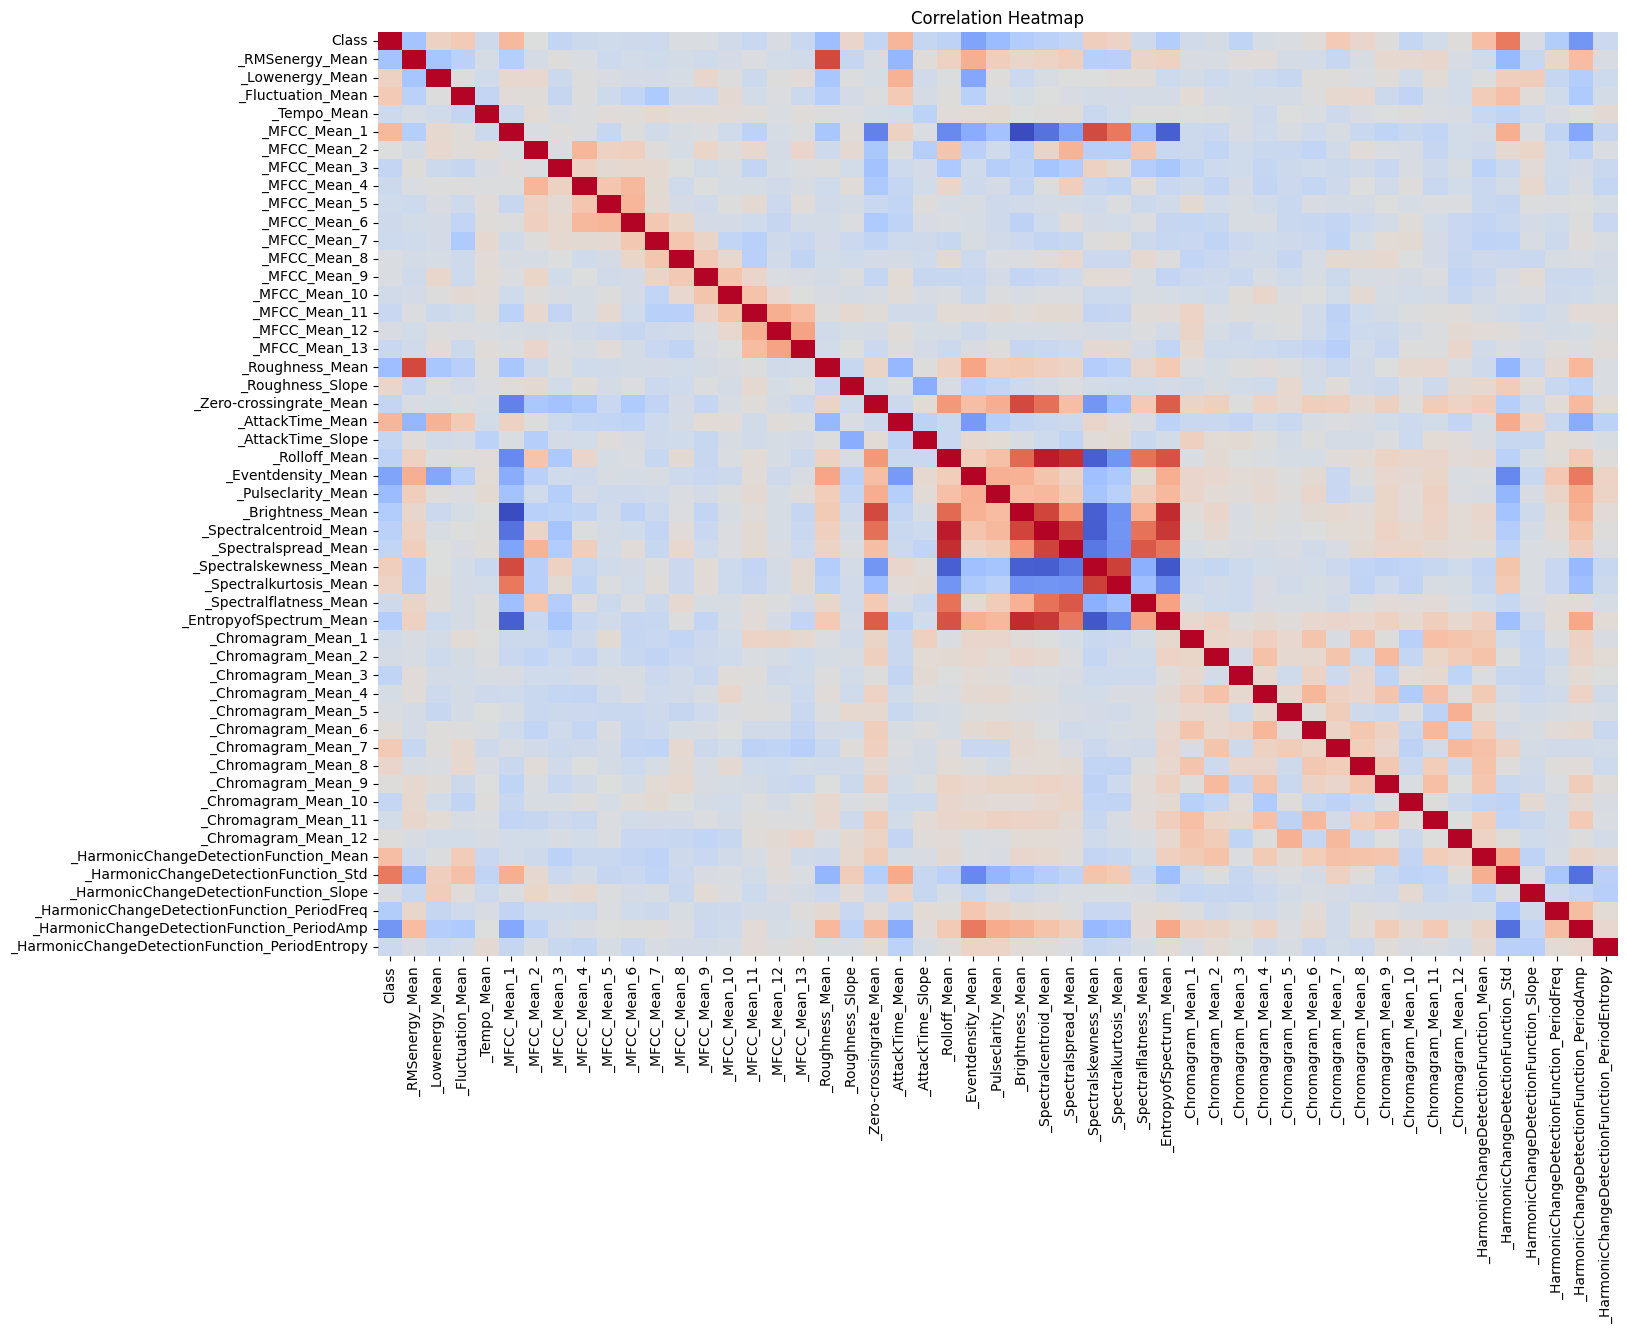

In [22]:
# Graficar Mapa de calor
heatmap = CorrelationHeatmap(encoded_data)  
heatmap.calculate_correlation()   
heatmap.plot_heatmap() 

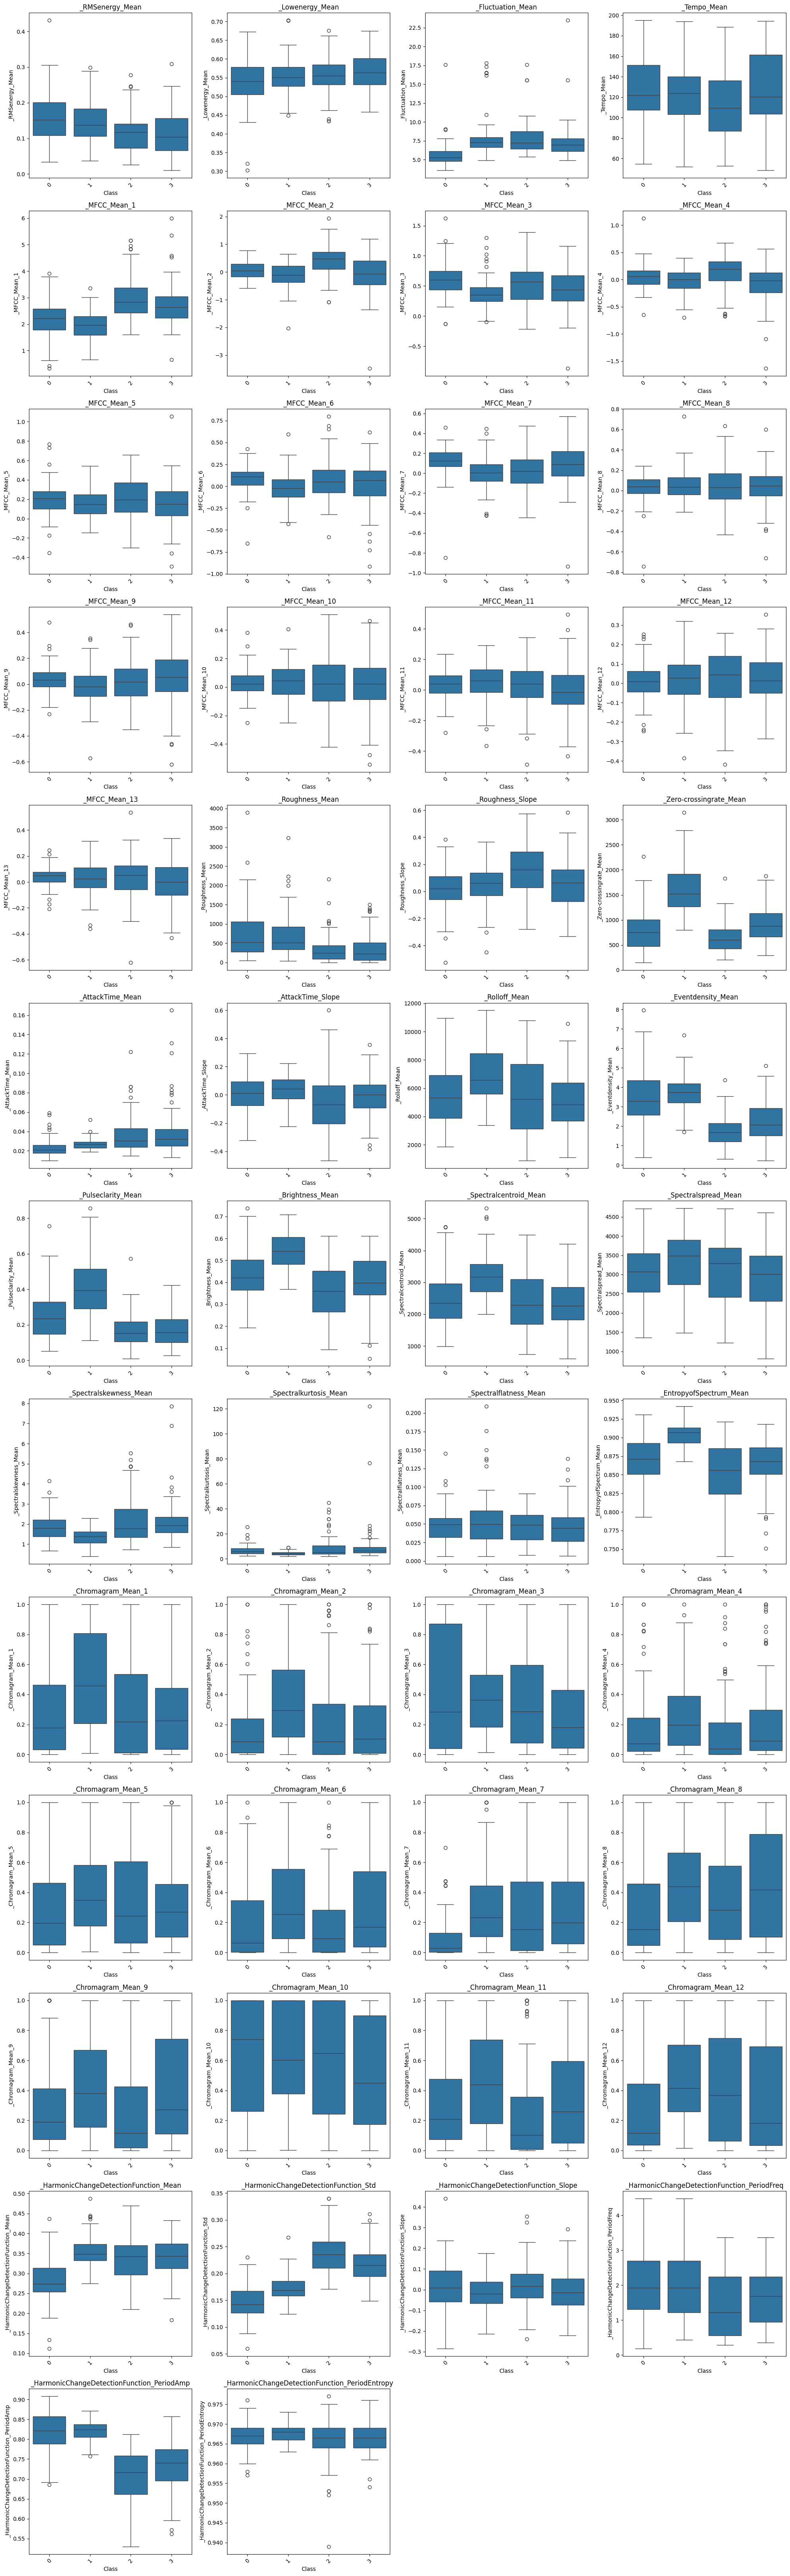

In [23]:
# Boxplots para cada columna de un DataFrame, agrupados por la variable de la columna Class
boxplot_generator = BoxPlotGenerator(df, 'Class', n_cols=4)
boxplot_generator.create_plots()

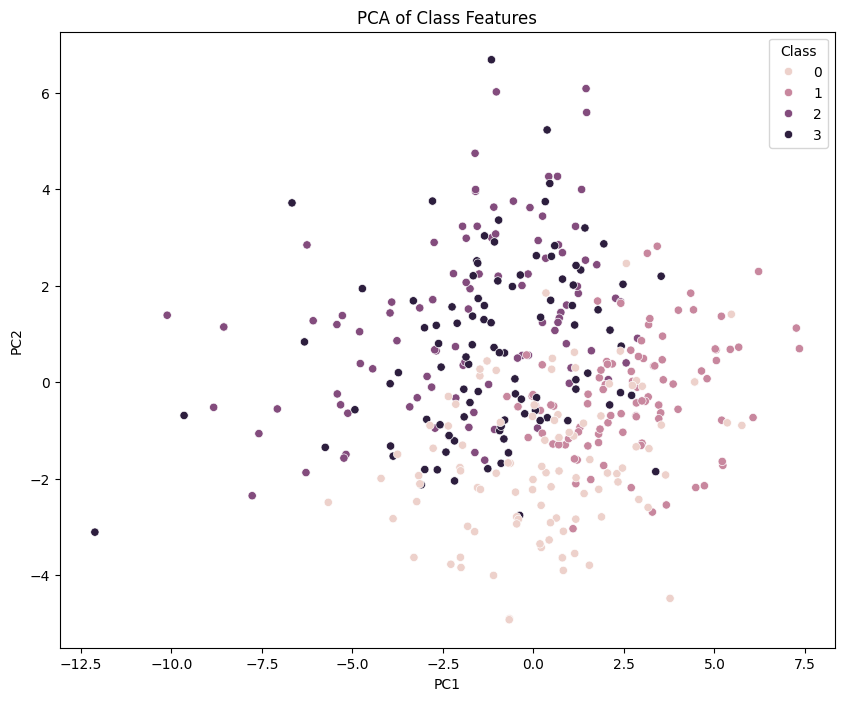

In [24]:
# Reducción de dimensionalidad (PCA) y visualización dentro de una clase. 
pca_visualizer = PCAVisualizer(df, 'Class', n_components=2)
pca_visualizer.run()